In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [6]:

print(cv2.__version__)

4.6.0


In [7]:
def read_file(filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        return img

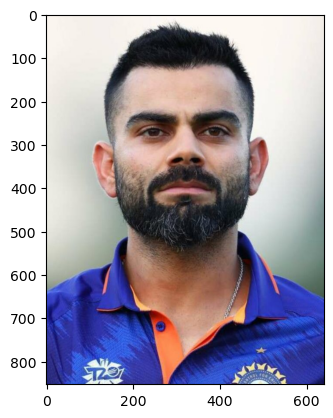

In [8]:
filename="virat.jpeg"
img=read_file(filename)
image=np.copy(img)

In [9]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,
                                  line_size, blur_value)
    return edges

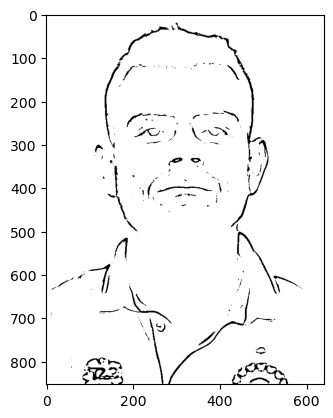

In [10]:
line_size,blur_value = 9,9

edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap="gray")
plt.show()

In [13]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ##Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result=center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

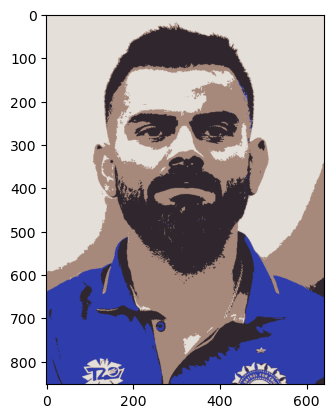

In [14]:
img_quantiz = color_quantization(img, k=4)

plt.imshow(img_quantiz)
plt.show()


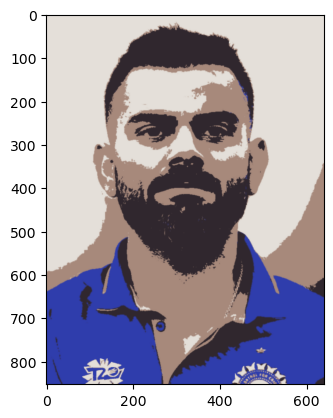

In [15]:
blurred = cv2.bilateralFilter(img_quantiz, d=4, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [18]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred,mask= edges)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(c)
    plt.title("Cartoon Image")
    plt.show()
    
    plt.imshow(image)
    plt.title("Original Image")
    plt.show()

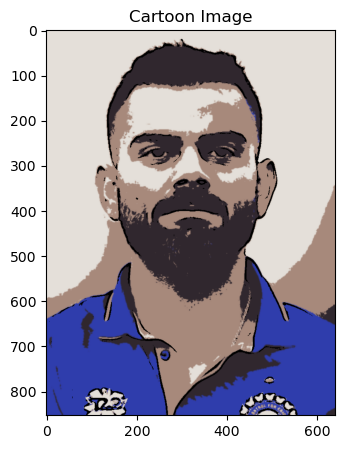

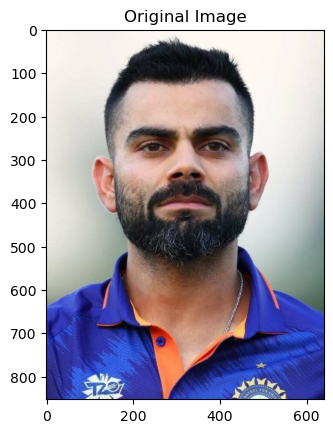

In [19]:
cartoon()